In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from scipy.stats import linregress
import csv

In [2]:
#open CSV
data = pd.read_csv("../GDPvsCOVID/Resources/covid.csv")
data.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [3]:
#reducing and cleaning data
cut_data = data[["continent", "location", "population","median_age", "gdp_per_capita",
                 "total_cases","total_vaccinations", "total_deaths", "diabetes_prevalence"]]
clean_data = cut_data.dropna()
clean_data

,continent,location,population,median_age,gdp_per_capita,total_cases,total_vaccinations,total_deaths,diabetes_prevalence
2,Europe,Albania,2872934.0,38.0,11803.431,178804.0,1842661.0,2841.0,10.08
5,Africa,Angola,33933611.0,16.8,5819.495,63197.0,5224697.0,1678.0,3.94
7,North America,Antigua and Barbuda,98728.0,32.1,21490.943,3918.0,101390.0,95.0,13.17
8,South America,Argentina,45605823.0,31.9,18933.907,5274766.0,56217372.0,115737.0,5.50
9,Asia,Armenia,2968128.0,35.7,8787.580,284237.0,514241.0,5842.0,7.11
...,...,...,...,...,...,...,...,...,...
215,Oceania,Vanuatu,314464.0,23.1,2921.909,4.0,87583.0,1.0,12.02
217,South America,Venezuela,28704947.0,29.0,16745.022,395223.0,16127242.0,4748.0,6.47
218,Asia,Vietnam,98168829.0,32.6,6171.884,870255.0,64992488.0,21344.0,6.00
222,Africa,Zambia,18920657.0,17.7,3689.251,209549.0,851990.0,3658.0,3.94


In [4]:
#Summary Table
summary = clean_data.groupby("continent").agg({"location":"count",
                                    "population":"sum",
                                    "median_age":"mean",
                                    "gdp_per_capita":"mean",
                                    "total_cases":"sum",
                                    "total_vaccinations": "sum",
                                    "total_deaths":"sum",
                                    "diabetes_prevalence":"mean"})

summary = summary.rename(columns={"location":"No. of Countries",
                                 "population":"Population",
                                  "median_age":"Median Age",
                                 "gdp_per_capita": "Average GDP/capita",
                                 "total_cases":"Total Cases",
                                 "total_vaccinations":"Total Vaccinations",
                                 "total_deaths":"Total Deaths",
                                 "diabetes_prevalence":"Diabetes Prevalance"})

summary.style.format({"No. of Countries":'{:,.0f}',"Total Vaccinations":'{:,.0f}',"Population":'{:,.0f}',
                      "Total Cases":'{:,.0f}', "Average GDP/capita":'{:,.0f}',"Total Deaths":'{:,.0f}',
                     "Diabetes Prevalance":'{:,.0f}%', "Median Age":'{:,.0f}'})

,No. of Countries,Population,Median Age,Average GDP/capita,Total Cases,Total Vaccinations,Total Deaths,Diabetes Prevalance
continent,,,,,,,,
Africa,45,"1,156,530,029",21,"5,768","8,058,302","157,621,694","203,529",5%
Asia,40,"4,466,810,919",31,"23,785","76,984,446","4,486,174,180","1,123,302",10%
Europe,39,"745,267,118",42,"33,917","61,908,118","823,054,791","1,256,502",6%
North America,20,"580,768,767",31,"17,122","53,324,535","630,178,538","1,094,073",11%
Oceania,4,"31,866,222",32,"23,090","206,462","40,867,856","2,269",10%
South America,12,"433,950,159",30,"13,841","38,136,842","482,815,312","1,164,783",8%


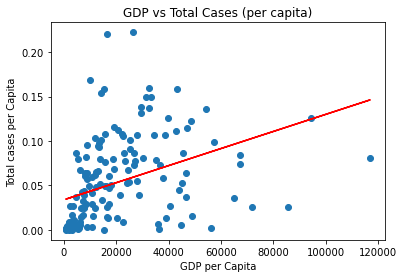

The r-value is: 0.3865399384772331


In [5]:
#GDP/capita vs Total Cases/capita

#dataframe
gdp_v_total_cases = clean_data[["location","gdp_per_capita","total_cases","population"]]
gdp_v_total_cases = gdp_v_total_cases.set_index(gdp_v_total_cases["location"])
gdp_v_total_cases

#linear regression
cases_slp, cases_int, cases_r, cases_p, cases_std = linregress(gdp_v_total_cases["gdp_per_capita"],
                                                               gdp_v_total_cases["total_cases"]/gdp_v_total_cases["population"])
cases_fit = cases_slp * gdp_v_total_cases["gdp_per_capita"] + cases_int

#Scatter plot
plt.scatter(gdp_v_total_cases["gdp_per_capita"],
            gdp_v_total_cases["total_cases"]/gdp_v_total_cases["population"])
plt.ylabel("Total cases per Capita")
plt.xlabel("GDP per Capita")
plt.title("GDP vs Total Cases (per capita)")
plt.plot(gdp_v_total_cases["gdp_per_capita"], cases_fit, "r-")
plt.show()

print(f"The r-value is: {cases_r}")

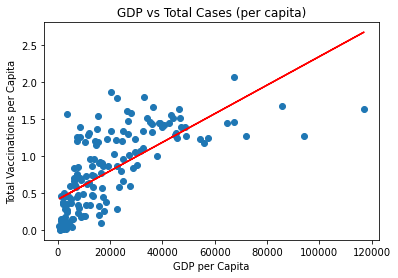

The r-value is: 0.7007688655670645


In [6]:
#GDP/capita vs Vaccinations/capita

#dataframe
gdp_v_total_vaccinations = clean_data[["location","gdp_per_capita","total_vaccinations","population"]]
gdp_v_total_vaccinations = gdp_v_total_vaccinations.set_index(gdp_v_total_cases["location"])
gdp_v_total_vaccinations

#linear regression
vax_slp, vax_int, vax_r, vax_p, vax_std = linregress(gdp_v_total_vaccinations["gdp_per_capita"],
                                                               gdp_v_total_vaccinations["total_vaccinations"]/gdp_v_total_vaccinations["population"])
vax_fit = vax_slp * gdp_v_total_vaccinations["gdp_per_capita"] + vax_int

#Scatter plot
plt.scatter(gdp_v_total_vaccinations["gdp_per_capita"],
            gdp_v_total_vaccinations["total_vaccinations"]/gdp_v_total_vaccinations["population"])
plt.ylabel("Total Vaccinations per Capita")
plt.xlabel("GDP per Capita")
plt.title("GDP vs Total Cases (per capita)")
plt.plot(gdp_v_total_vaccinations["gdp_per_capita"], vax_fit, "r-")
plt.show()

print(f"The r-value is: {vax_r}")

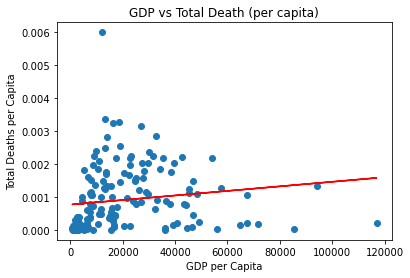

The r-value is: 0.14346408860619608


In [7]:
#GDP/capita vs Total Deaths/capita

#dataframe
gdp_v_total_deaths = clean_data[["location","gdp_per_capita","total_deaths","population"]]
gdp_v_total_deaths = gdp_v_total_deaths.set_index(gdp_v_total_deaths["location"])
gdp_v_total_deaths

#linear regression
death_slp, death_int, death_r, death_p, death_std = linregress(gdp_v_total_deaths["gdp_per_capita"],
                                                               gdp_v_total_deaths["total_deaths"]/gdp_v_total_deaths["population"])
death_fit = death_slp * gdp_v_total_deaths["gdp_per_capita"] + death_int

#Scatter plot
plt.scatter(gdp_v_total_deaths["gdp_per_capita"],
            gdp_v_total_deaths["total_deaths"]/gdp_v_total_deaths["population"])
plt.ylabel("Total Deaths per Capita")
plt.xlabel("GDP per Capita")
plt.title("GDP vs Total Death (per capita)")
plt.plot(gdp_v_total_deaths["gdp_per_capita"], death_fit, "r-")
plt.show()

print(f"The r-value is: {death_r}")


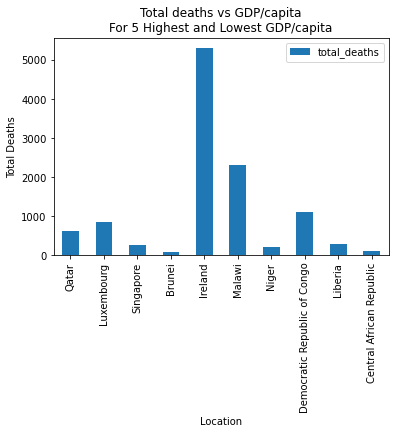

In [35]:
high_low_gdp = clean_data.nlargest(5,"gdp_per_capita")
high_low_gdp = high_low_gdp.append(clean_data.nsmallest(5,"gdp_per_capita"))
high_low_gdp = high_low_gdp.sort_values(by="gdp_per_capita", ascending=False)

high_low_gdprename(columns={"location":"No. of Countries",
                                 "population":"Population",
                                  "median_age":"Median Age",
                                 "gdp_per_capita": "Average GDP/capita",
                                 "total_cases":"Total Cases",
                                 "total_vaccinations":"Total Vaccinations",
                                 "total_deaths":"Total Deaths",
                                 "diabetes_prevalence":"Diabetes Prevalance"})

high_low_gdp.plot.bar(x="location", y="total_deaths")
plt.title("Total deaths vs GDP/capita\nFor 5 Highest and Lowest GDP/capita")
plt.xlabel("Location")
plt.ylabel("Total Deaths")
plt.show()

<AxesSubplot:xlabel='location'>

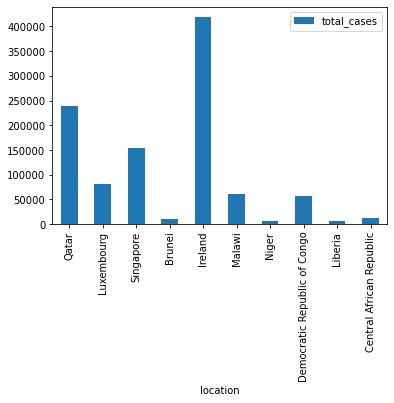

In [13]:
high_low_gdp.plot.bar(x="location", y="total_cases")
plt.title("Total Cases vs GDP/capita\nFor 5 Highest and Lowest GDP/capita")
plt.xlabel("Location")
plt.ylabel("Total Cases")

Text(0, 0.5, 'Total Vaccinations')

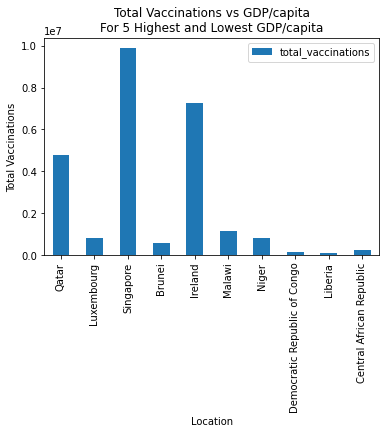

In [37]:
high_low_gdp.plot.bar(x="location", y="total_vaccinations")
plt.title("Total Vaccinations vs GDP/capita\nFor 5 Highest and Lowest GDP/capita")
plt.xlabel("Location")
plt.ylabel("Total Vaccinations")

In [15]:
high_low_gdp

,continent,location,population,median_age,gdp_per_capita,total_cases,total_vaccinations,total_deaths,diabetes_prevalence
164,Asia,Qatar,2930524.0,31.9,116935.600,238079.0,4796589.0,608.0,16.52
120,Europe,Luxembourg,634814.0,39.7,94277.965,80085.0,806150.0,840.0,4.42
179,Asia,Singapore,5896684.0,42.4,85535.383,154725.0,9889827.0,246.0,10.99
30,Asia,Brunei,441532.0,32.4,71809.251,11220.0,563695.0,77.0,12.79
98,Europe,Ireland,4982904.0,38.7,67335.293,419087.0,7285321.0,5306.0,3.28
123,Africa,Malawi,19647681.0,18.1,1095.042,61732.0,1148069.0,2295.0,3.94
147,Africa,Niger,25130810.0,15.1,926.000,6193.0,803146.0,205.0,2.42
54,Africa,Democratic Republic of Congo,92377986.0,17.0,808.133,57338.0,140254.0,1091.0,6.10
116,Africa,Liberia,5180208.0,19.2,752.788,5807.0,93617.0,286.0,2.42
39,Africa,Central African Republic,4919987.0,18.3,661.240,11478.0,255345.0,100.0,6.10
